# Non Linear Regression Analysis

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

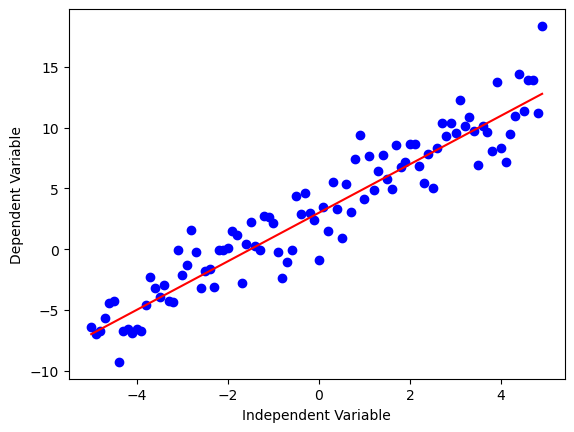

In [19]:
x = np.arange(-5.0 , 5.0 , 0.1 )
y = 2 * (x) + 3
y_noice = 2 * np.random.normal(size = x.size)

ydata = y + y_noice

plt.plot(x, ydata, 'bo') # 'bo': A format 'b': Color 'b' stands for blue ,'o': Shape-circular points
plt.plot(x, y, "r")

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

plt.show()


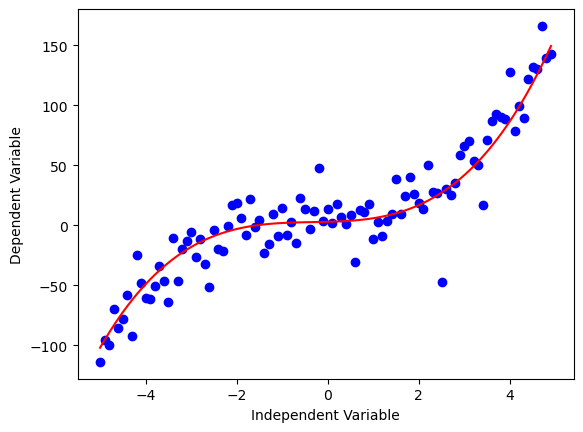

In [20]:
x = np.arange(-5.0 , 5.0 , 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noice = 20 * np.random.normal(size = x.size)
ydata = y + y_noice

plt.plot(x , ydata , 'bo')
plt.plot(x , y , "r")

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

plt.show()

# Quadratic

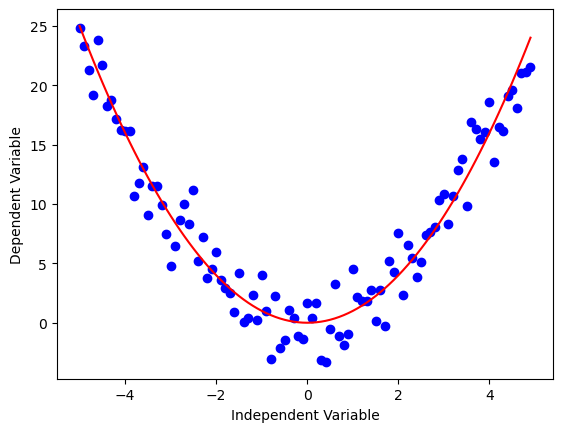

In [21]:
x = np.arange(-5,5,.1)
y = np.power(x,2)
y_noice = 2 * np.random.normal(size = x.size)
ydata = y + y_noice

plt.plot(x , ydata , 'bo')
plt.plot(x , y , "r")

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')

plt.show()

# Exponential 
An exponential function with base c is defined by $$ Y = a + b c^X$$  

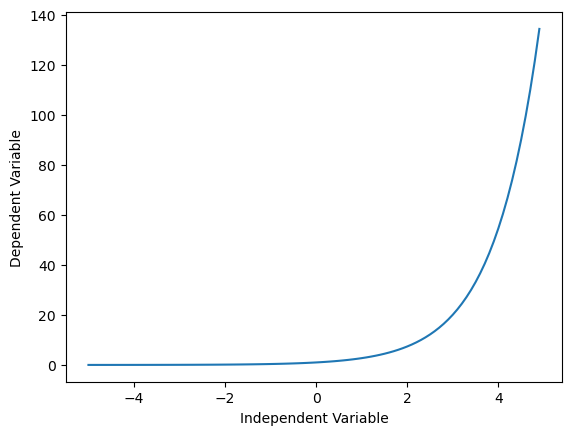

In [22]:
x = np.arange(-5 , 5 , .1)
y = np.exp(x) 

plt.plot(x,y)
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()


# Logarithmic $$ y = \log(x)$$

C:\Users\admin\AppData\Local\Temp\ipykernel_14100\2676987571.py:2: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


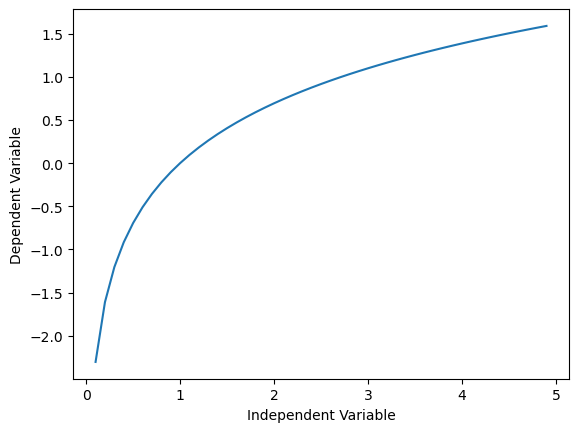

In [23]:
x = np.arange(-5,5,.1)
y = np.log(x)

plt.plot(x,y)

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

### Sigmoidal/Logistic

$$ Y = a + \frac{b}{1+ c^{(X-d)}}$$


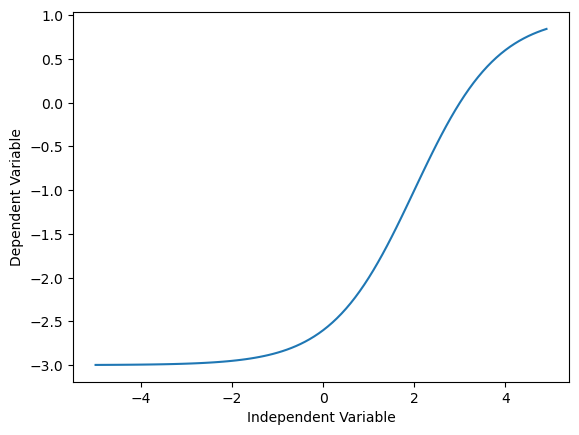

In [24]:
x = np.arange(-5,5,.1)
y = 1 - 4 / (1 + np.power(3,x-2))

plt.plot(x,y)

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

# Non-Linear Regression example

In [25]:
df = pd.read_csv(r"T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\Ml_project_IBM\china_gdp.csv")
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


## Plotting the Dataset

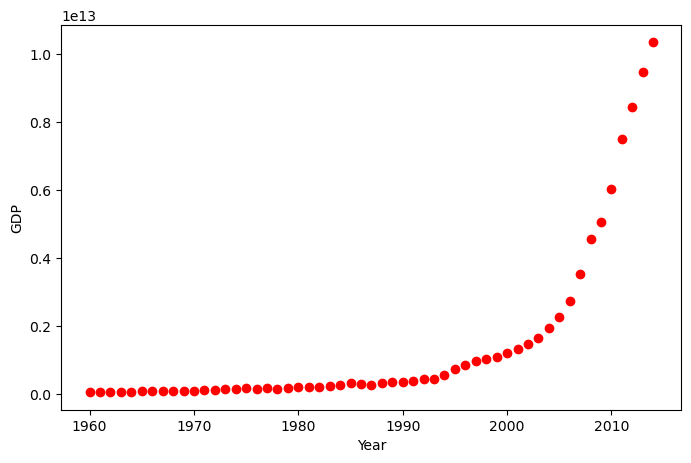

In [29]:
plt.figure(figsize=(8,5))
xdata , ydata = (df["Year"].values , df["Value"].values)
plt.plot(xdata,ydata,'ro')

plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

### Choosing a model

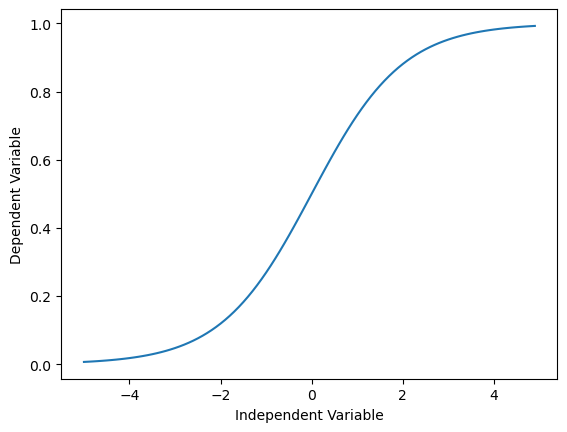

In [31]:
x = np.arange(-5,5,.1)
y = 1 / (1 + np.exp(-x))

plt.plot(x , y )

plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()



The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.


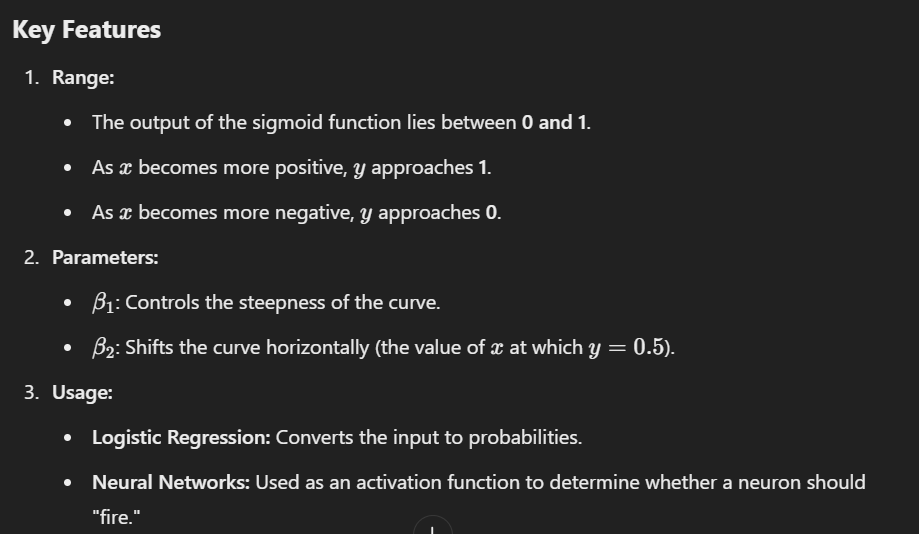

### Building The Model

In [32]:
def sigmoid(x, beta1, beta2):
    y = 1 / (1 + np.exp(-beta1*(x - beta2)))
    return y 

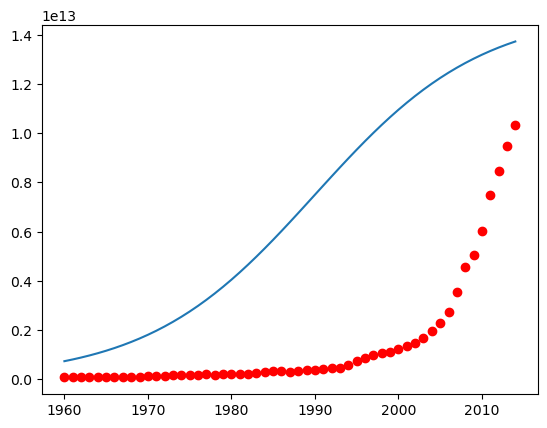

In [46]:
beta1 = 0.10
beta2 = 1990.0

y_pred = sigmoid(xdata, beta1 , beta2 )

plt.plot(xdata,y_pred*15000000000000)
plt.plot(xdata,ydata,"ro")

import numpy as np

 Example data
xdata = np.array([1, 2, 3, 4, 5])
ydata = np.array([10, 20, 30, 40, 50])

Normalize
xdata = xdata / max(xdata)
ydata = ydata / max(ydata)

 Output
print("Normalized xdata:", xdata)
print("Normalized ydata:", ydata)



 output

Normalized xdata: [0.2 0.4 0.6 0.8 1. ]
Normalized ydata: [0.2 0.4 0.6 0.8 1. ]

In [48]:
xdata = xdata / max(xdata) ## Lets normalize our data , divide largest value of xdata
ydata = ydata / max(ydata)

result is that the largest value in xdata becomes 1, and all other values are scaled proportionally between 0 and 1.


#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, *popt) - ydata is minimized.

popt are our optimized parameters.


Python code snippet uses scipy.optimize.curve_fit to fit the sigmoid function to a given set of data (xdata and ydata) and extracts the best-fit parameters Beta_1 and Beta_2. Here's an explanation of what it does:

curve_fit function is used to fit a custom function (here, the sigmoid function) to data.

popt, pcov = curve_fit(sigmoid, xdata, ydata)

curve_fit tries to find the optimal parameters for the sigmoid function that best fit the xdata and ydata.

popt: The optimal values of the parameters 𝛽1 and 𝛽2 (as a tuple).

pcov: The covariance matrix of the parameters, which can provide information about the uncertainty of the fit.


Prints the fitted values of Beta_1 and Beta_2


In [49]:
from scipy.optimize import curve_fit
popt , pcov = curve_fit(sigmoid,xdata,ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0],popt[1]))



 beta_1 = 690.451712, beta_2 = 0.997207


In [50]:
pcov

array([[ 1.52271494e+03, -2.88118935e-04],
       [-2.88118935e-04,  7.25961451e-09]])

Now we plot our resulting regression model.


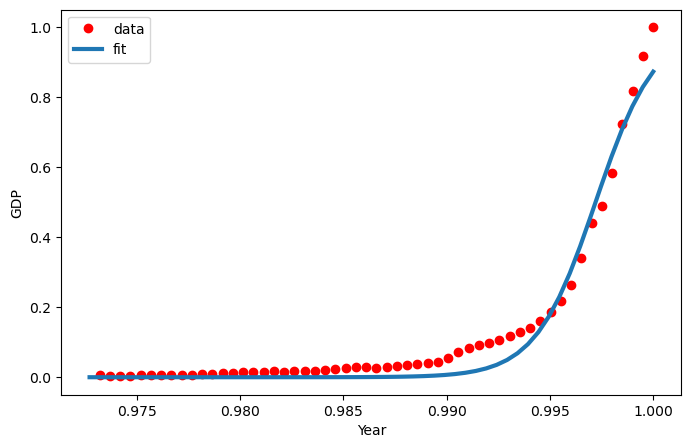

In [55]:
x = np.linspace(1960, 2015, 55) #55 evenly spaced values between 1960 and 2015
x = x/max(x) # normalizes these values to a range between 0 and 1
plt.figure(figsize=(8,5)) #Sets the size of the figure to 8x5 inches.
y = sigmoid(x, *popt) #sigmoid(x, *popt) computes the predicted sigmoid values using the parameters (Beta_1 and Beta_2) from the earlier curve fitting.
plt.plot(xdata, ydata, 'ro', label='data') #Plots the original data points (xdata, ydata) as red circles ('ro').
plt.plot(x,y, linewidth=3.0, label='fit') #Plots the fitted sigmoid curve (x, y) with a thicker line (linewidth=3.0).
plt.legend(loc='best') #legend is a visual key that helps identify the different elements within a plot.
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()